<a href="https://colab.research.google.com/github/trista-paul/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

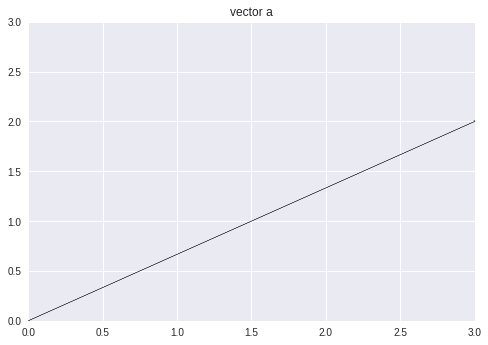

In [53]:
import numpy as np
import matplotlib.pyplot as plt
a = np.array([3,2])

plt.arrow(0, 0, a[0], a[1], head_width=.02, head_length=0.01)
plt.xlim(0,3)
plt.ylim(0,3)
plt.title('vector a')
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [2]:
b = [17, -4, -2, 1]
np.linalg.norm(b)

17.60681686165901

A norm is the length of the line made by a vector.

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [3]:
c = [3, 7, -2, 12]
d = [9, -7, 4, 6]
np.dot(c,d)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [4]:
E = np.array([[7,4,2],[1,3,-1],[2,6,4]])
np.linalg.inv(E)

array([[ 0.17647059, -0.03921569, -0.09803922],
       [-0.05882353,  0.23529412,  0.08823529],
       [-0.        , -0.33333333,  0.16666667]])

In [5]:
E.transpose()

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1,  4]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [6]:
import pandas as pd
from statistics import mean, stdev
customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [7]:
df.mean(0)

customers    1135.714286
snow            2.714286
dtype: float64

In [8]:

df.std(0)

customers    314.264069
snow           2.927700
dtype: float64

In [9]:
df.var(0)

customers    98761.904762
snow             8.571429
dtype: float64

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

The variance in snow and customers cannot be compared directly because the difference in scale inflates their positive relationship.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [10]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [11]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Country,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,England,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,Wales,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,Scotland,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,North Ireland,209,93,674,1033,143,586,355,187,334,1506,139


In [12]:
df.dtypes

Alcoholic Drinks       int64
Beverages              int64
Carcass_Meat           int64
Cereals                int64
Cheese                 int64
Confectionery          int64
Country               object
Fats_and_Oils          int64
Fish                   int64
Fresh_Fruit            int64
Fresh_Potatoes         int64
Fresh_Veg              int64
Other_Meat             int64
Other_Veg              int64
Processed_Potatoes     int64
Processed_Veg          int64
Soft_Drinks            int64
Sugars                 int64
dtype: object

In [13]:
dfnum = df.select_dtypes(exclude=['object'])
dfnum

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139


In [14]:
import statistics
means = []
stdevs = []
for label, columns in dfnum.iteritems():
  means.append(statistics.mean(columns))
  stdevs.append(statistics.stdev(columns))
means

[360.75,
 57.5,
 245.25,
 1502.5,
 94.25,
 55.25,
 205.25,
 130.5,
 967.5,
 798.25,
 208,
 706,
 457.75,
 202,
 349,
 1427,
 154.25]

In [15]:
stdevs

[156.71284780344803,
 11.120551545074852,
 16.5,
 54.65955238260433,
 18.85691738681944,
 10.436314802968846,
 22.36626924634504,
 29.557852876463585,
 210.6125985468739,
 200.75586334318274,
 60.18859249614221,
 93.42733361638159,
 92.47116667733064,
 13.73559851869101,
 15.769168230019828,
 140.61294392764842,
 15.478479684172259]

In [0]:
x = 0
cleaned = pd.DataFrame()
for label, columns in dfnum.iteritems():
    columns = (columns-means[x])/stdevs[x]
    x = x+1
    cleaned[label] = columns

In [17]:
cleaned.tail()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,0.090931,-0.044962,-0.015152,-0.557999,0.570083,-0.119774,-0.547700,0.558227,0.638613,-0.389777,0.747650,-0.224774,0.327129,-0.291214,0.697564,-0.376921,0.113060
1,0.729040,1.393816,-1.106061,1.454458,0.464021,0.838419,1.330128,0.998043,0.804795,0.377324,0.947023,1.038240,1.213892,0.072804,1.014638,-1.216104,1.340571
2,0.620562,-0.404656,-0.196970,-0.740950,0.464021,0.646780,-0.950091,-0.287572,-0.049855,-1.156878,-0.614734,0.470954,-0.429864,1.310463,-0.760979,1.031200,-0.468392
3,-1.440533,-0.944198,1.318182,-0.155508,-1.498124,-1.365425,0.167663,-1.268698,-1.393554,1.169331,-1.079939,-1.284421,-1.111157,-1.092053,-0.951223,0.561826,-0.985239


In [18]:
cleaned.std()

Alcoholic Drinks      1.0
Beverages             1.0
Carcass_Meat          1.0
Cereals               1.0
Cheese                1.0
Confectionery         1.0
Fats_and_Oils         1.0
Fish                  1.0
Fresh_Fruit           1.0
Fresh_Potatoes        1.0
Fresh_Veg             1.0
Other_Meat            1.0
Other_Veg             1.0
Processed_Potatoes    1.0
Processed_Veg         1.0
Soft_Drinks           1.0
Sugars                1.0
dtype: float64

In [19]:
abs(round(cleaned.mean()))

Alcoholic Drinks      0.0
Beverages             0.0
Carcass_Meat          0.0
Cereals               0.0
Cheese                0.0
Confectionery         0.0
Fats_and_Oils         0.0
Fish                  0.0
Fresh_Fruit           0.0
Fresh_Potatoes        0.0
Fresh_Veg             0.0
Other_Meat            0.0
Other_Veg             0.0
Processed_Potatoes    0.0
Processed_Veg         0.0
Soft_Drinks           0.0
Sugars                0.0
dtype: float64

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit(dfnum).transform(dfnum)
pca

array([[-144.99315218,   -2.53299944],
       [-240.52914764, -224.64692488],
       [ -91.869339  ,  286.08178613],
       [ 477.39163882,  -58.90186182]])

In [21]:
x = [pca[0][0], pca[1][0], pca[2][0], pca[3][0]]
x

[-144.99315218207676,
 -240.52914763517663,
 -91.86933899886365,
 477.391638816117]

In [22]:
y = [pca[0][1], pca[1][1], pca[2][1], pca[3][1]]
y

[-2.5329994370406514,
 -224.64692488126903,
 286.08178613426225,
 -58.901861815952685]

Text(0, 0.5, 'Principle Component 2')

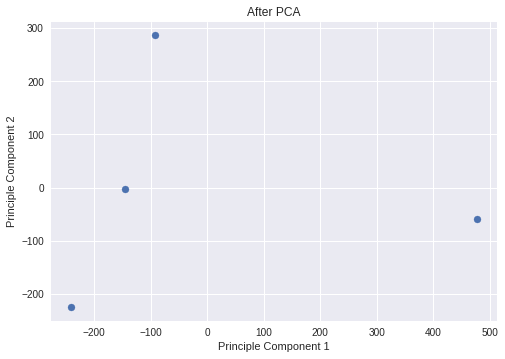

In [51]:
plt.scatter(x,y)
plt.title('After PCA');
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [24]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


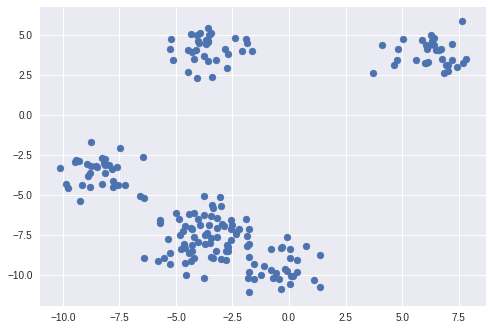

In [25]:
plt.scatter(points.x, points.y)
plt.show()

In [26]:
centroidx = points.x.mean()
centroidy = points.y.mean()
print(centroidx,centroidy)

-2.32329816340267 -3.4228690080745237


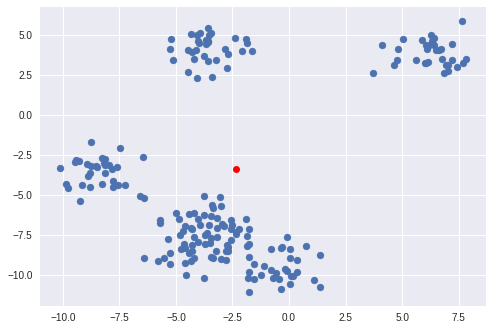

In [34]:
ax = plt.subplot(1,1,1)
ax.scatter(points.x, points.y)
ax.plot(centroidx, centroidy, "or")
plt.show()

In [30]:
centroids = points.sample(3)
centroids.head()

,x,y
88,-5.282528,-8.679744
125,-7.589134,-3.262040
30,-3.166290,-7.646237


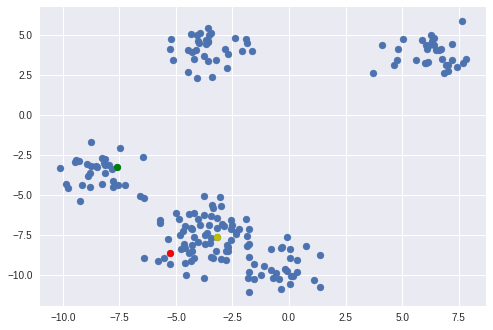

In [35]:
ax = plt.subplot(1,1,1)
ax.scatter(points.x, points.y)
ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "or")
ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "og")
ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "oy")
plt.show()

In [42]:
import math
import numpy as np
from scipy.spatial import distance

def find_nearest_centroid(df, centroids, it):
  distances = distance.cdist(df, centroids, 'euclidean')
  nearest_centroids = np.argmin(distances, axis=1)
  nearest_centroids = pd.Series(nearest_centroids)
  df['cluster'+it] = nearest_centroids.values
  return df
df1 = find_nearest_centroid(points.select_dtypes(exclude='int64'), centroids, '1')
df1.tail()

,x,y,cluster1
195,-3.560689,4.567320,1
196,5.051216,4.745086,2
197,6.127624,4.285188,2
198,-1.783078,-8.890394,2
199,-0.339587,-8.344952,2


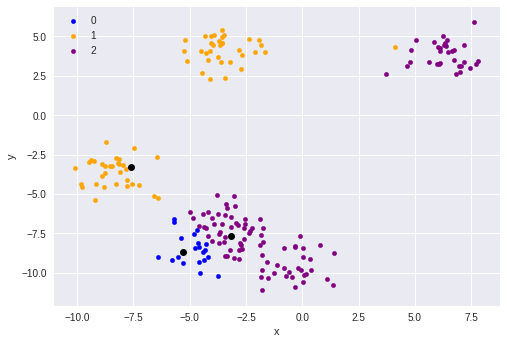

In [47]:
def plot_clusters(df, header, centroids):
  colors = {0: 'blue', 1:'orange', 2:'purple'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  grouped = df.groupby(header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()
  
plot_clusters(df1, 'cluster1', centroids)

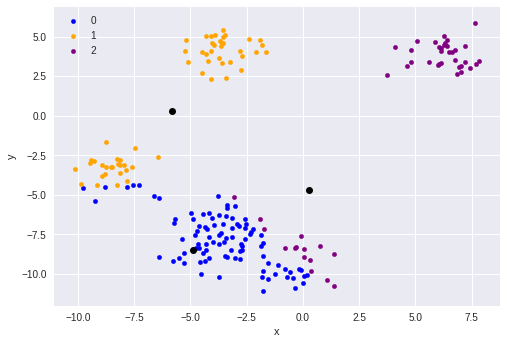

In [48]:
def get_centroids(df, header):
  new_centroids = df.groupby(header).mean()
  return new_centroids

centroids = get_centroids(df1, 'cluster1')

df2 = find_nearest_centroid(df1.select_dtypes(exclude='int64'), centroids, '2')
plot_clusters(df2, 'cluster2', centroids)

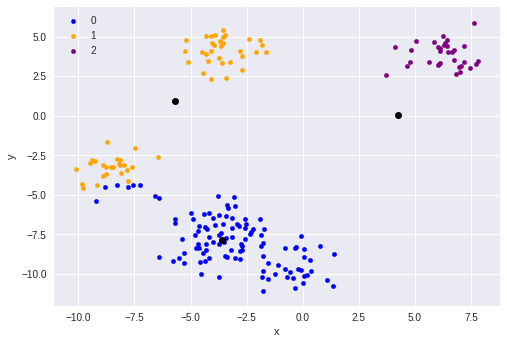

In [49]:
centroids = get_centroids(df2, 'cluster2')

df3 = find_nearest_centroid(df2.select_dtypes(exclude='int64'), centroids, '3')
plot_clusters(df3, 'cluster3', centroids)

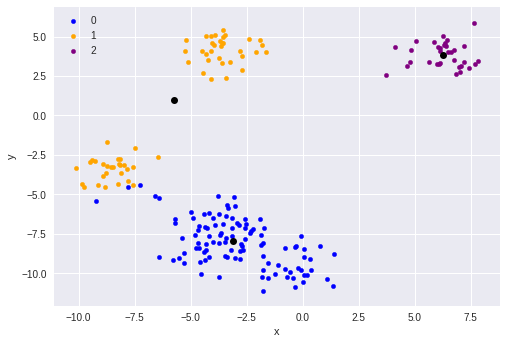

In [50]:
centroids = get_centroids(df3, 'cluster3')

df4 = find_nearest_centroid(df3.select_dtypes(exclude='int64'), centroids, '4')
plot_clusters(df4, 'cluster4', centroids)